# Data-X IEOR 290: HW 3
### Ankit Dutta
#### SID : 3032167048


## Q1 Read in the data

* 1: Read in the data stored in the CSV file at this URL https://www.dropbox.com/s/cz2kpe1oklwif3j/data3.csv?dl=1 to a Pandas DataFrame called `df`. 

**Note:** Use pandas method `pd.read_csv('URL')` or download the file, place it in the same folder as the notebook and use `pd.read_csv('file_name')`.

Please run `df.head()`, it should produce the following output:

<img src="https://www.dropbox.com/s/m19qu65cb5g2dci/hw3.1.df.head.png?dl=1" width="600" height="200" />

### Data description
**Data source:** http://www.fao.org/nr/water/aquastat/data/query/index.html?lang=en

**Data, units:** 
- GDP, current USD (CPI adjusted)
- NRI, mm/yr
- Population density, inhab/km^2
- Total area of the country, 10 ha = 0.1km^2
- Total Population, unit 1000 inhabitants

In [7]:
# Load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''#### INPUT SOLUTION FOR Q1 HERE AND PRINT df.head() ####'''
df= pd.read_csv('data3.csv')
df.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Argentina,9.0,Total area of the country,4100.0,1962.0,278040.0,E,NaN
1,Argentina,9.0,Total area of the country,4100.0,1967.0,278040.0,E,NaN
2,Argentina,9.0,Total area of the country,4100.0,1972.0,278040.0,E,NaN
3,Argentina,9.0,Total area of the country,4100.0,1977.0,278040.0,E,NaN
4,Argentina,9.0,Total area of the country,4100.0,1982.0,278040.0,E,NaN


## Q2 Data preprocessing / Clean up the data

* 1: **Drop rows**: First get rid of all the unnecessary bottom rows in `df` that do not have any country information the Area column. (Hint: Inspect the CSV file in order to find out which rows to get rid of)

* 2: **Drop columns**: drop the columns **Area Id, Variable Id, Symbol**, and **Md**.

* 3: **Convert the 'Year' column string values** to pandas datetime objects, where only the year is specified. To do this, simply run the code below (please review it carefully and make sure you understand what happens):
    
    `df['Year'] = pd.to_datetime(pd.Series(df['Year']).astype(int),format='%Y').dt.year`



Run `df.tail()`, it should produce the following output:


<img src="https://www.dropbox.com/s/706luf5z492psnv/hw3.1.df_tail.png?dl=1&1" width="600" height="200" />

In [8]:
'''#### INPUT SOLUTION FOR Q2 HERE AND PRINT df.tail() ####'''
#Drop na's from those without country information
df=df.dropna(subset=['Area Id'])
#Drop columns Area ID, Variable ID,Symbol,Md
df=df.drop('Area Id',axis=1).drop('Variable Id',axis=1).drop('Symbol',axis=1).drop('Md',axis=1)
#Convert the year to datetime
df['Year'] = pd.to_datetime(pd.Series(df['Year']).astype(int),format='%Y').dt.year
df.tail()

,Area,Variable Name,Year,Value
385,United States of America,National Rainfall Index (NRI),1981,949.2
386,United States of America,National Rainfall Index (NRI),1984,974.6
387,United States of America,National Rainfall Index (NRI),1992,1020.0
388,United States of America,National Rainfall Index (NRI),1996,1005.0
389,United States of America,National Rainfall Index (NRI),2002,938.7


## Q3 Extract specific statistics
* 1: Print the years when the National Rainfall Index (NRI) was greater than 950 or less than 900 in Iceland, by using this code:


`df[(df['Area']=='Iceland') & (df['Variable Name']=='National Rainfall Index (NRI)') & ( (df['Value']>950) | (df['Value']<900) )]['Year']`
    
    
* 2: Print the countries where 'Total area of the country' has a Value > 40000 (hint: when you have extracted the results you can use the `.unique()` method to only print the unique countries).

* 3: Print the rows where 'Population density' has a Value > 65

In [9]:
'''#### INPUT SOLUTION FOR Q3 HERE AND PRINT THE RESULTS BELOW ####'''
print(df[(df['Area']=='Iceland') & (df['Variable Name']=='National Rainfall Index (NRI)') & ( (df['Value']>950) | (df['Value']<900) )]['Year'])
#Area for country>40000
print(df[(df['Variable Name']=='Total area of the country')&((df['Value']>40000))]['Area'].unique())
#Population Density>65
print(df[(df['Variable Name']=='Population density')&(df['Value']>65)])


214    1967
215    1971
216    1975
218    1986
219    1991
220    1997
Name: Year, dtype: int64
['Argentina' 'Australia' 'Sweden' 'United States of America']
        Area       Variable Name  Year   Value
136  Germany  Population density  1962  208.00
137  Germany  Population density  1967  216.00
138  Germany  Population density  1972  220.50
139  Germany  Population density  1977  220.00
140  Germany  Population density  1982  218.00
141  Germany  Population density  1987  218.10
142  Germany  Population density  1992  224.30
143  Germany  Population density  1997  229.70
144  Germany  Population density  2002  228.80
145  Germany  Population density  2007  226.40
146  Germany  Population density  2012  225.30
147  Germany  Population density  2015  225.80
256  Ireland  Population density  2012   66.42
257  Ireland  Population density  2015   66.70


# Q4 US Data Exploration
* 1: Create a new DataFrame called **`df_us`** that only contains values where 'Area' is equal to 'United States of America'. Set the indices to be the 'Year' column and pivot the DataFrame so that the unique 'Variable Name' entries becomes the column entries. The DataFrame values should be the ones in the the 'Value' column. Do this by running the three lines of code below:

        1. df_us = df[df['Area']=='United States of America']
        2. df_us.set_index('Year',inplace=True)
        3. df_us=df_us.pivot(columns='Variable Name',values='Value')
        
        
* 2: Rename the columns to `['GDP','NRI','PD','Area','Population']`.


* 3: Multiply the Area for all countries by 10 (so instead of 10 ha, the unit becomes 100 ha = 1km^2)


* 4: Create a new column in df_us called 'GDP/capita' and populate it with the calculated GDP per capita. Round the results to two decimal points.


* 5: Create a new column called 'PD2' (i.e. Population density 2). Calculate the Population density. **Note: the units should be inhab/km^2** (see Data description above). Round the reults to two decimal point.


**Running `df_head()`** should produce:

<img src="https://www.dropbox.com/s/0bwrca41cmc5w09/hw3.1.df_head_2.png?dl=1&2" width="600" height="200" />

In [10]:
df_us = df[df['Area']=='United States of America']
df_us.set_index('Year',inplace=True)
df_us=df_us.pivot(columns='Variable Name',values='Value')

###Renaming columns 
df_us.columns=['GDP','NRI','PD','Area','Population']
#Multiplying area of countries by 10
df_us['Area']=df_us['Area']*10

#Creating a new column 'GDP/Capita'
df_us['GDP/capita']=(df_us['GDP']/df_us['Population']).round(2)

#Creating PD2 
df_us['PD2']=((df_us['Population']/df_us['Area'])*1000).round(2)

df_us.head()

,GDP,NRI,PD,Area,Population,GDP/capita,PD2
Year,,,,,,,
1962,6.050000e+11,NaN,19.93,9629090.0,191861.0,3153324.54,19.93
1965,NaN,928.5,NaN,NaN,NaN,NaN,NaN
1967,8.620000e+11,NaN,21.16,9629090.0,203713.0,4231443.26,21.16
1969,NaN,952.2,NaN,NaN,NaN,NaN,NaN
1972,1.280000e+12,NaN,22.14,9629090.0,213220.0,6003189.19,22.14


# Q5 US statistics:
#### Column Mean/Average, Compare Population Density, Find min/max NRI & Handle NaN entries

* 1: Calculate and print all the column averages and the column standard deviations.


* 2: Compare the columns 'PD' and 'PD2'. Is there any year when the two columns are not equal (exclude the years with NaN entries and the year 2015 for the 'PD' column)?


* 3: Drop column 'PD2' from the DataFrame df_us.


* 4: Find the maximum value and minimum value of the 'NRI' column in the US (using pandas methods). What years do the min and max values occur?


* 5: Fill some of the NaN entries in df_us by calculating the average of the values stored the year before and the year after the NaN value (i.e., one row above and one row below, Note: this only works if there are values both above and below the NaN entry). Do this for each NaN entry in all the columns. Hint, one way to do this: Try using `.shift(2)`, adding two dfs, dividing the resulting df by two, shifting the average values to the NaN rows with `.shift(-1)` and then filling the NaN with the results using `.fillna(**args**)`


* 6: Fill the rest of the NaN values in the 'NRI' column with the mean of the other values in the column, round the results to two decimal points (hint: use DataFrame method `.fillna(**args**)`). 

**Printing `df_us.tail(10)`** should give you:


<img src="https://www.dropbox.com/s/hv6htxtbavqf4d2/hw3.1.df_tail_3.png?dl=1&2" width="600" height="200" />

In [11]:
#Mean and standard deviation 
df_us.describe()
#Compare the columns 'PD' and 'PD2'. Is there any year when the two columns are not equal 
#(exclude the years with NaN entries and the year 2015 for the 'PD' column)?
df_uspd=df_us.dropna(subset=['PD'])
print((df_uspd['PD']==df_uspd['PD2'])[df_uspd.index!=2015])
#Drop column 'PD2' from the DataFrame df_us.

df_us=df_us.drop('PD2',axis=1)

#Find the maximum value and minimum value of the 'NRI' column in the US (using pandas methods). 
#What years do the min and max values occur?
print('The maximum value of NRI is',(df_us.max()),'and it is in the year',(df_us['NRI'].idxmax()))
print('The minimum value of NRI is',(df_us.min()),'and it is in the year',(df_us['NRI'].idxmin()))

# Fill some of the NaN entries in df_us by calculating the average of the values stored the year before 
#and the year after the NaN value (i.e., one row above and one row below, 
#Note: this only works if there are values both above and below the NaN entry). 
#Do this for each NaN entry in all the columns. Hint, one way to do this: Try using .shift(2), adding two dfs, 
#dividing the resulting df by two, shifting the average values to the NaN rows with .shift(-1) and then filling the NaN with the results using .fillna(**args**)

df_shifted=df_us.shift(2)
df_us2=(df_shifted+df_us)/2
df_us2=df_us2.shift(-1)
df_us.fillna(df_us2,inplace=True)
df_us['NRI'].fillna(df_us['NRI'].mean(),inplace=True)
df_us.tail(10)

Year
1962    True
1967    True
1972    True
1977    True
1982    True
1987    True
1992    True
1997    True
2002    True
2007    True
2012    True
dtype: bool
The maximum value of NRI is GDP           1.790000e+13
NRI           1.020000e+03
PD            3.273000e+01
Area          9.831510e+06
Population    3.217740e+05
GDP/capita    5.562911e+07
dtype: float64 and it is in the year 1992
The minimum value of NRI is GDP           6.050000e+11
NRI           9.285000e+02
PD            1.993000e+01
Area          9.629090e+06
Population    1.918610e+05
GDP/capita    3.153325e+06
dtype: float64 and it is in the year 1965


,GDP,NRI,PD,Area,Population,GDP/capita
Year,,,,,,
1984,4.105000e+12,974.600000,24.895,9629090.0,239689.5,1.705972e+07
1987,4.870000e+12,997.300000,25.490,9629090.0,245425.0,1.984313e+07
1992,6.540000e+12,1020.000000,26.780,9629090.0,257908.0,2.535788e+07
1996,7.575000e+12,1005.000000,27.560,9629090.0,265395.5,2.845493e+07
1997,8.610000e+12,971.850000,28.340,9629090.0,272883.0,3.155198e+07
2002,1.100000e+13,938.700000,29.950,9632030.0,288471.0,3.813208e+07
2007,1.450000e+13,971.878571,31.320,9632030.0,301656.0,4.806800e+07
2012,1.620000e+13,971.878571,32.020,9831510.0,314799.0,5.146141e+07
2014,1.705000e+13,971.878571,32.375,9831510.0,318286.5,5.354526e+07


## Extra Credit 1: Simple plotting

* 1: Fill NaN value for column 'Area' in 2015 with the same value as it was in 2014.


* 2: Scatter plot NRI against year. Use `plt.scatter(x,y)` followed by `plt.show()`. Hint: Use `x=df_us.index.values` to access the 'Year' index values.


* 3: Normalize all values in df_us. In order to do so use this formula on all columns: 

    `norm_value = (value - col_mean)/(max(col_value)-min(col_value))`. 
    
    Where `value` is an arbitrary value stored in df_us, `col_mean` is the mean of the column that value belongs to, `max(col_value)` is the maximum value of the same column, and `min(col_value)` is the minimum value of that column. Store the results in a new df called `df_norm`.



**`df_norm.head()` should print:**

<img src="https://www.dropbox.com/s/io6vru0u2qcasga/hw3.dfnorm_head.png?dl=1" width="600" height="200" />




## Extra Credit 1 (continued): Line plot
* **4:** Line plot all the column values in df_norm. The values of df_norm should be plotted on the y-axis and the indices 'Years' should be plotted on the x-axis (try using pandas method `df_norm.plot()` followed by `plt.show()`). What can you say about the results, can you find some kind of correlation between the column values?

In [12]:
#1: Fill NaN value for column 'Area' in 2015 with the same value as it was in 2014.

df_us['Area'].fillna(method='ffill',inplace=True)
df_us.tail(10)

,GDP,NRI,PD,Area,Population,GDP/capita
Year,,,,,,
1984,4.105000e+12,974.600000,24.895,9629090.0,239689.5,1.705972e+07
1987,4.870000e+12,997.300000,25.490,9629090.0,245425.0,1.984313e+07
1992,6.540000e+12,1020.000000,26.780,9629090.0,257908.0,2.535788e+07
1996,7.575000e+12,1005.000000,27.560,9629090.0,265395.5,2.845493e+07
1997,8.610000e+12,971.850000,28.340,9629090.0,272883.0,3.155198e+07
2002,1.100000e+13,938.700000,29.950,9632030.0,288471.0,3.813208e+07
2007,1.450000e+13,971.878571,31.320,9632030.0,301656.0,4.806800e+07
2012,1.620000e+13,971.878571,32.020,9831510.0,314799.0,5.146141e+07
2014,1.705000e+13,971.878571,32.375,9831510.0,318286.5,5.354526e+07


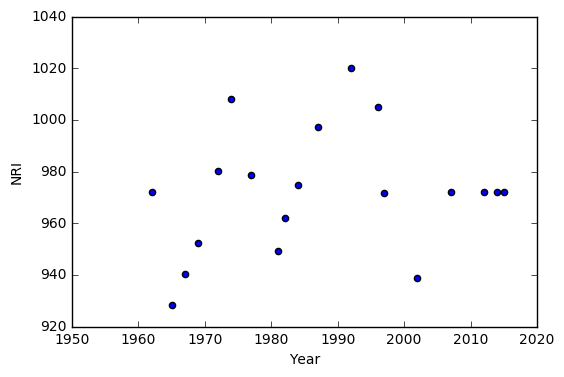

In [13]:
#2: Scatter plot NRI against year. Use plt.scatter(x,y) followed by plt.show(). 
#Hint: Use x=df_us.index.values to access the 'Year' index values.

plt.scatter(df_us.index.values,df_us['NRI'])
plt.xlabel('Year')
plt.ylabel('NRI')
plt.show()

In [14]:
#3: Normalize all values in df_us. In order to do so use this formula on all columns:
#norm_value = (value - col_mean)/(max(col_value)-min(col_value)).
#Where value is an arbitrary value stored in df_us, col_mean is the mean of the column that value belongs to, max(col_value) 
#is the maximum value of the same column, and min(col_value) is the minimum value of that column. 
#Store the results in a new df called df_norm.
#norm_value=(df_us-(df_us.mean(axis=1)))/(max(df_us(axis=1))-min(df_us(axis=1)))
df_norm=df_us
df_norm['GDP']=(df_norm['GDP']-(df_norm['GDP'].mean()))/(df_norm['GDP'].max()-df_norm['GDP'].min())
df_norm['NRI']=(df_norm['NRI']-(df_norm['NRI'].mean()))/(df_norm['NRI'].max()-df_norm['NRI'].min())
df_norm['PD']=(df_norm['PD']-(df_norm['PD'].mean()))/(df_norm['PD'].max()-df_norm['PD'].min())
df_norm['Area']=(df_norm['Area']-(df_norm['Area'].mean()))/(df_norm['Area'].max()-df_norm['Area'].min())
df_norm['Population']=(df_norm['Population']-(df_norm['Population'].mean()))/(df_norm['Population'].max()-df_norm['Population'].min())
df_norm['GDP/capita']=(df_norm['GDP/capita']-(df_norm['GDP/capita'].mean()))/(df_norm['GDP/capita'].max()-df_norm['GDP/capita'].min())
df_norm['NRI']=df_norm['NRI']
df_norm.head()


,GDP,NRI,PD,Area,Population,GDP/capita
Year,,,,,,
1962,-0.338511,-2.484958e-15,-0.460835,-0.159424,-0.445520,-0.375653
1965,-0.331081,-4.740827e-01,-0.412788,-0.159424,-0.399905,-0.365380
1967,-0.323651,-3.445746e-01,-0.364741,-0.159424,-0.354290,-0.355108
1969,-0.311567,-2.150664e-01,-0.326460,-0.159424,-0.317700,-0.338226
1972,-0.299483,8.985168e-02,-0.288178,-0.159424,-0.281110,-0.321345


# Extra credit 2: Pivot Table

** Note! For this question, reuse the original `df` DataFrame object created in Q2 **

* 1: A pivot table is a multiindexed table, as you can see below. The two indices are 'Country' and 'Year'. Use pandas method **`pivot_table`** on your DataFrame, and specify the multi-level `index=['Area','Year']` and `columns='Variable Name'`. See [http://pandas.pydata.org/pandas-docs/stable/10min.html#pivot-tables](http://pandas.pydata.org/pandas-docs/stable/10min.html#pivot-tables)       (**Note:** Don't assign the argument `values=**arg**`, anything). Store the pivot table as `df`.


* 2: Drop the 'Value' index-level of the pivoted DataFrame by running `df = df.xs('Value', axis=1, drop_level=True)`


* 3: Rename the 'Area' column indicating country name to 'Country' using: `df.index.rename(names=['Country','Year'],inplace=True)`

* 4: Rename the index 'United States of America' to 'USA'. (Hint: Try using the `df.rename(index={**key:value**},inplace=True)` method)


** And as in the US example: **


* 5: Rename the columns to `['GDP','NRI','PD','Area','Population']`.

* 6: Multiply the Area for all countries by 10 (so instead of 10 ha, the unit becomes 100 ha = 1km^2)


Print `df.tail()`, it should look like:

<img src="https://www.dropbox.com/s/nckchy6bvtczsrs/h3.1.df_tail_2.png?dl=1&1" width="600" height="200" />

In [15]:
df=df.pivot_table(index=['Area','Year'], columns='Variable Name')


In [16]:
df = df.xs('Value', axis=1, drop_level=True)

In [17]:
df.index.rename(names=['Country','Year'],inplace=True)

In [18]:
df.rename(index={'United States of America':'USA'},inplace=True)


In [19]:
df.columns=['GDP','NRI','PD','Area','Population']

In [20]:
df['Area']=df['Area']*10


In [21]:
df.tail()

GDP    NRI     PD       Area  Population
Country Year                                                   
USA     2002  1.100000e+13  938.7  29.95  9632030.0    288471.0
        2007  1.450000e+13    NaN  31.32  9632030.0    301656.0
        2012  1.620000e+13    NaN  32.02  9831510.0    314799.0
        2014           NaN    NaN    NaN  9831510.0         NaN
        2015  1.790000e+13    NaN  32.73        NaN    321774.0